<a href="https://colab.research.google.com/github/cherrylyncanoza/AIDA2-Activities/blob/main/Practical%20Quiz/Canoza_Practical_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Practical Quiz**
###Canoza, Cherrylyn S.
###201913191


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

##1. Read the dataset in xls file

In [33]:
###Pokemon excel file converted into csv
pokemon_dataset = pd.read_csv("https://github.com/cherrylyncanoza/AIDA2-Activities/blob/main/Practical%20Quiz/pokemon.csv?raw=true", encoding='unicode_escape')
pokemon_dataset

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...,...,...,...
1163,716,Xerneas,FAIRY,680,126,131,95,131,98,99
1164,717,Yveltal,DARK,680,126,131,95,131,98,99
1165,717,Yveltal,FLYING,680,126,131,95,131,98,99
1166,718,Zygarde,DRAGON,600,108,100,121,81,95,95


##2. Clean the data if not yet cleaned.
##3. Create a python program that will show the descriptive analysis of the datasets (Count, min, max, standard deviation, 75%,50%, and 25%)

In [34]:
def descriptive_analysis (data):
  data.drop_duplicates(inplace = True) ###To remove all the duplicate: 
  data.dropna(inplace = True) ###To remove the missing data:

  ###Checking the percentage of the missing data for every column in file: 
  for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('Percentage of the missing data per column: {} - {}%'.format(col, round(pct_missing*100)))

  ###For the Descriptive Analysis:
  descriptive = data.describe()
  print(f'\n\nThe Descriptive Analysis of the Data:\n',descriptive)

In [35]:
descriptive_analysis(pokemon_dataset)

Percentage of the missing data per column: # - 0%
Percentage of the missing data per column: Name - 0%
Percentage of the missing data per column: Type - 0%
Percentage of the missing data per column: Total - 0%
Percentage of the missing data per column: HP - 0%
Percentage of the missing data per column: Attack - 0%
Percentage of the missing data per column: Defense - 0%
Percentage of the missing data per column: Special Attack - 0%
Percentage of the missing data per column: Special Defense - 0%
Percentage of the missing data per column: Speed - 0%


The Descriptive Analysis of the Data:
              Total           HP       Attack      Defense  Special Attack  \
count  1158.000000  1158.000000  1158.000000  1158.000000     1158.000000   
mean    434.243523    69.416235    78.405872    74.200345       72.333333   
std     115.863349    24.954745    31.445405    30.504878       31.483754   
min     180.000000     1.000000     5.000000     5.000000       10.000000   
25%     330.000000   

##4. Draw a scatter plot

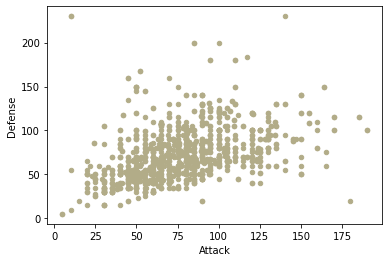

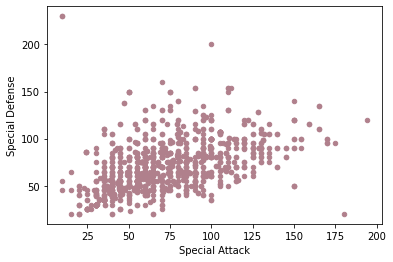

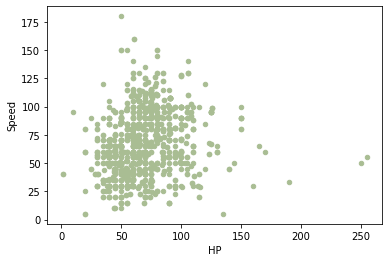

In [38]:
plot1 = pokemon_dataset.plot(kind='scatter', x='Attack', y='Defense', color='#B2AC88')    
plot2 = pokemon_dataset.plot(kind='scatter', x='Special Attack', y='Special Defense', color='#B0808C')    
plot3 = pokemon_dataset.plot(kind='scatter', x='HP', y='Speed', color='#A9BD93')

##5. Create a python program that will plot and show the regression line and regression coefficient.

Regression intercept: [44.02472472]
Regression Coefficient: [[0.39360495]]


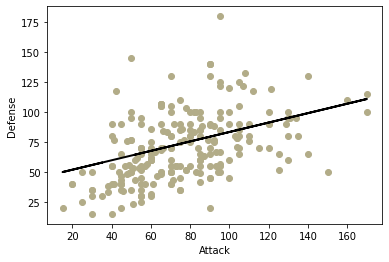

In [72]:
X = pokemon_dataset['Attack'].values.reshape(-1,1) ###Reshaping the file 
y = pokemon_dataset['Defense'].values.reshape(-1,1) ###Reshaping the file 

###Training Algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Regression intercept:', regressor.intercept_) ###retrieving the intercept:

print(f'Regression Coefficient:' ,regressor.coef_) ###retrieving the slope:

###Plotting
plt.scatter(X_test, y_test, color="#B2AC88")
plt.plot(X_test, y_pred, color="black", linewidth=2)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

## 6. Create a python code to predict future values. Is linear regression the appropriate method to use to predict future values? Why?

##**Answer:** Linear Regression is commonly used for predictive analysis therefore, it is the appropriate method to use for predicting future values if right amount of data is given. It explains and helps to understand the relationship of each data to each other that can predict situations and future outcomes.

In [80]:
y_pred = regressor.predict(X_test)

future_values = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
future_values

,Actual,Predicted
0,60,64.492182
1,122,86.140454
2,86,67.641022
3,140,79.449170
4,55,72.757886
...,...,...
227,110,107.001516
228,90,87.321269
229,20,79.449170
230,55,75.513121
